In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data = np.arange(10)

In [4]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


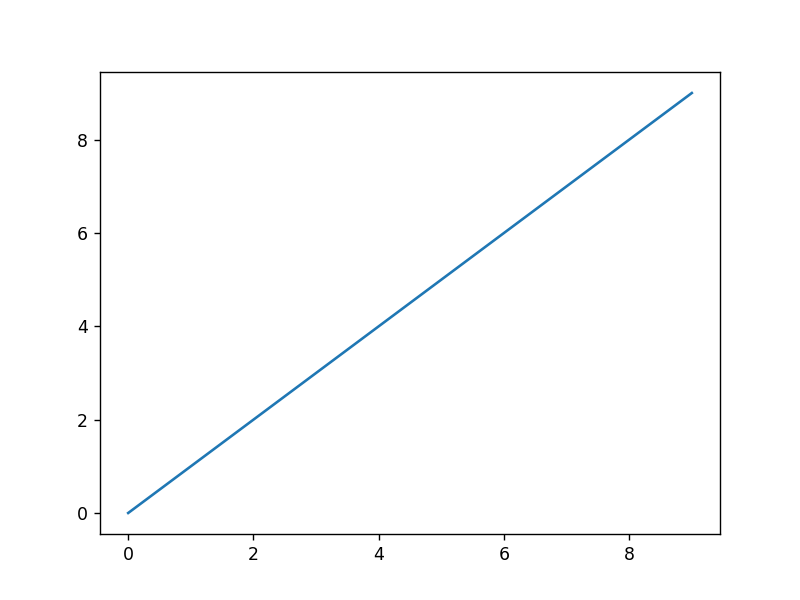

In [6]:
plt.plot(data)

Plots in matplotlib reside within(驻留) a **Figure** object.  **Create a new figure with `plt.figure`**. `plt.figure` 有许多参数，特别是figure，它用于确保当图片存到磁盘时具有一定的大小和纵横比(guarantee the figure has a certain size and aspect ratio if saved to disk)

<IPython.core.display.Javascript object>


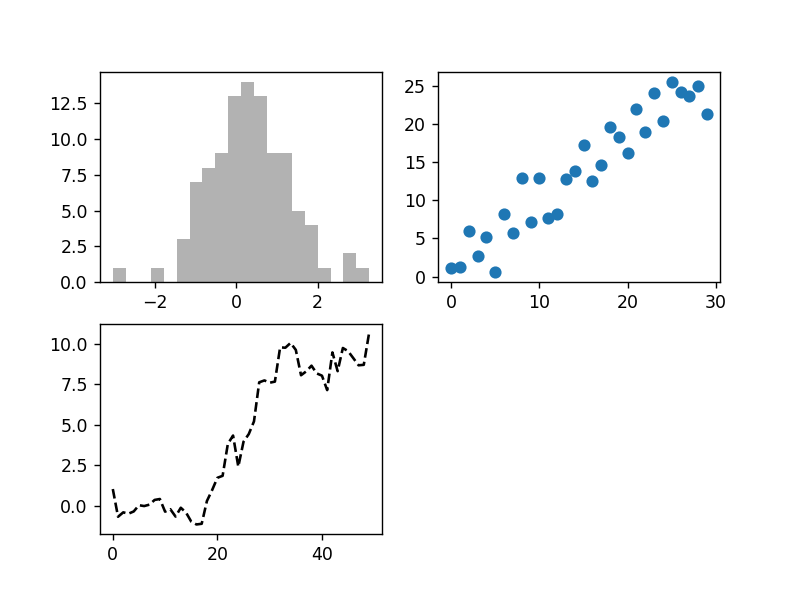

In [7]:
fig = plt.figure()

> In IPython, an empty plot will appear, but in jupyter nothing will be shown till u using a few more commands.

Can't make a plot with a blank figure. **Create one or more subplots using `add_subplot`**.

In [8]:
ax1 = fig.add_subplot(2, 2, 1)  # or ax1 = fig.add_subplot(221)

> 代码的意思：图像是2 x 2的，且是当前选中的是4个中的第一个（编号从1开始）。

create the next two subplots

In [9]:
ax2 = fig.add_subplot(222)

In [10]:
ax3 = fig.add_subplot(223)

> 上图是交互式的，在逐步运行中可以看到变化。

**One nuance (细微差别) of using Jupyter notebooks is that plots are reset after each cell is evaluated, so for more complex plots you must put all of the plotting commands in a single notebook cell.**

```python
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
```

issue a plotting command like `plt.plot([1.5, 3.5, -2, 1.6])`, **matplotlib draws on the last figure and subplot used (creating one if necessary)**, thus hiding the figure and subplot creation.

**pyplot具有状态性特性，能跟踪当前图形和绘图区域的状态。调用函数时，函数只对当前图形起作用。**

In [12]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

The **'k--'** is a *style* option instructing matplotlib to plot a black dashed line (黑色虚线图).

The objects returned by `fig.add_subplot` here are **AxesSubplot** objects, on which u can directly plot on the other empty subplots by calling each one's instance method.&emsp;由`fig.add_subplot`返回的是**AxesSubplot** 对象，直接调用它们的实例方法可以在空着的子图里画图。

In [13]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=.3)

In [14]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

根据特定布局创建Figure和subplot很常见

**`plt.subplots` create a new few and returns a NumPy array containing the created subplot objects**

<IPython.core.display.Javascript object>


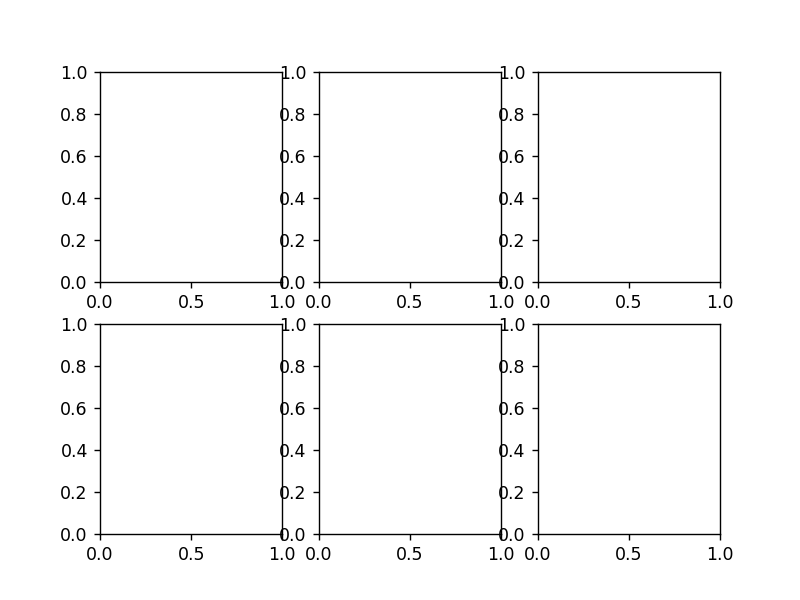

In [24]:
fig, axes = plt.subplots(2, 3)

In [16]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000242C8CD87B8>,
      dtype=object)

可以轻松地对`axes`进行索引，如`axes[0, 1]`。

通过`sharex`和`sharey`指定subplots应该具有相同的X轴和Y轴（x- or y- axis）。在比较相同范围内的数据时很实用。否则matplotlib将会自动缩放各图表的界限（matplotlib autoscales plot limits independently）。

<IPython.core.display.Javascript object>


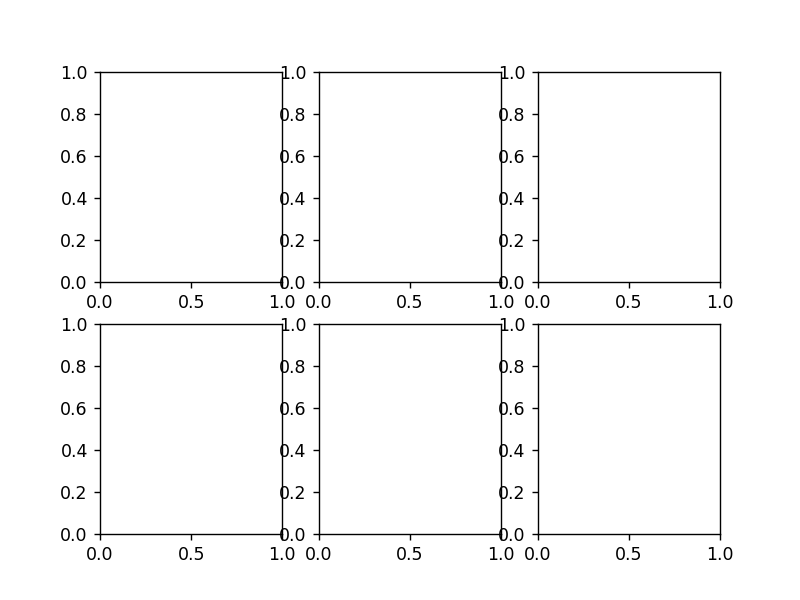

In [25]:
fig

**`pyplot.subplots` options**

|Argument|Description|
| :----- | :----------|
|nrows|Number of rows of subplots|
|ncols|Number of columns of subplots|
|sharex|所有的subplots使用相同的x-axis ticks(调整xlim会影响所有的subplots)|
|sharey|所有的subplots使用相同的y-axis ticks(调整ylim会影响所有的subplots)|
|subplot_kw|Dict of keywords passed to `add_subplot` call used to create each subplot|
|\*\*fig_kw|Additional keywords to subplots are used when creating the figure, such as `plt.subplot(2, 2, figsize=(8, 6))`|

### Adjusting the spacing around subplots（调整subplots的间距）

默认情况下，matplotib会在subplots外围留下一定的边距(a certain amount of padding around the outside of the subplots)，并在subplots之间留下一定的间距(spacing)。间距(spacing)与图像的高度(height)宽度(width)有关, so that if u resize the plot(调整图像大小) either programmatically or(编程) manually using the GUI window(手动), the plot will dynamically(自动地) adjust itself.

使用Figure对象的`subplots_adjust`方法可以change the spacing，此外它也是top-level func(顶级函数)

```python
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
```
`wspace`和`hspace`各自控制the percent of the figure width and figure height to use as spacing between subplots.

shrink the spacing all the way to 0:

<IPython.core.display.Javascript object>


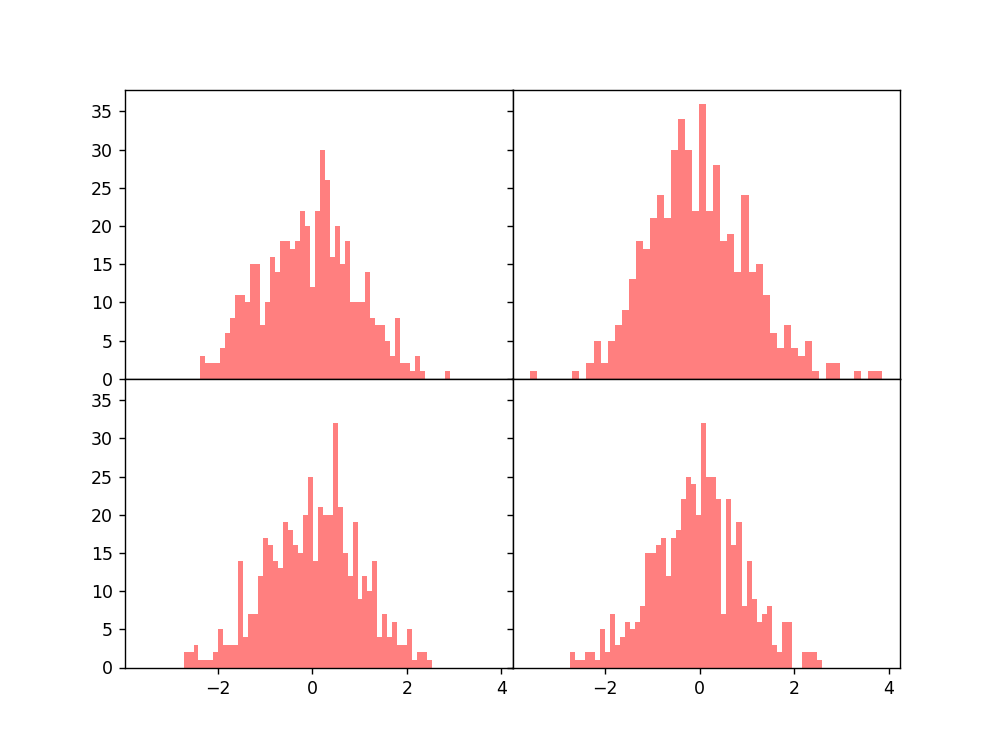

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='r', alpha=.5)
plt.subplots_adjust(wspace=0, hspace=0)

> 轴标签重叠了(overlap)。matplotlib不会检查标签是否重叠，这种情况只能fix the labels yourself by specifying explicit(明确的) tick locations (刻度位置)and tick labels(刻度标签)。

### Colors, Markers and Line Style

<IPython.core.display.Javascript object>


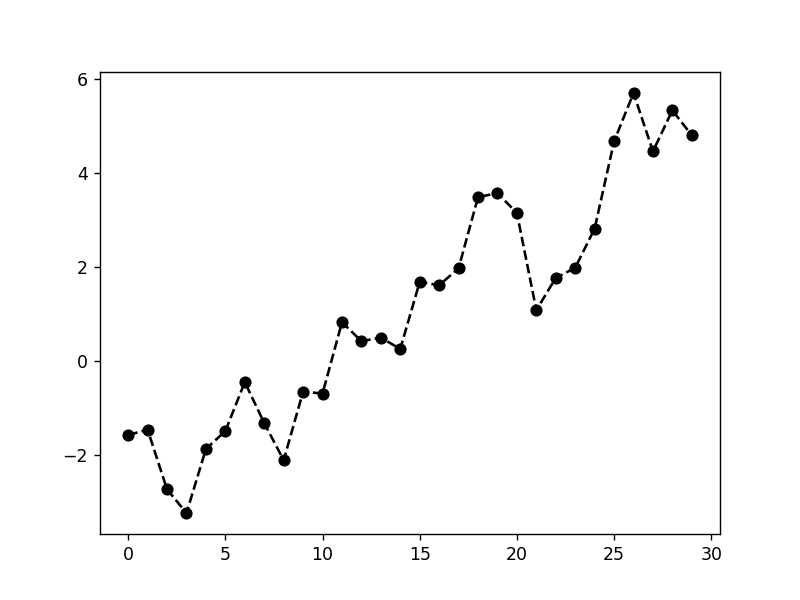

In [34]:
plt.figure()
plt.plot(np.random.randn(30).cumsum(), 'ko--')

或者写成
```python
plt.plot(np.random.randn(30).cumsum(), color='k', linestyle='--'(or 'dashed'), marker='o')
```

线型图中，非实际数据点默认是按线性方式插值的，可以通过drawstyle修改

In [40]:
data = np.random.randn(30).cumsum()

In [41]:
data

array([ -0.24950871,  -0.03348746,  -1.39800248,   0.04806217,
        -1.09318767,  -1.925642  ,  -2.73448462,  -3.53056747,
        -4.06709598,  -3.37871989,  -4.64980461,  -3.89100044,
        -5.98143443,  -6.72730882,  -6.61872333,  -7.96594702,
        -8.89205092,  -9.89371793,  -8.88624447,  -7.20914029,
        -6.84441243,  -7.6974207 ,  -9.15983291, -10.62095327,
       -10.63110484, -10.62130075, -10.90458388, -10.97947854,
       -10.39262877, -10.24149202])

<IPython.core.display.Javascript object>


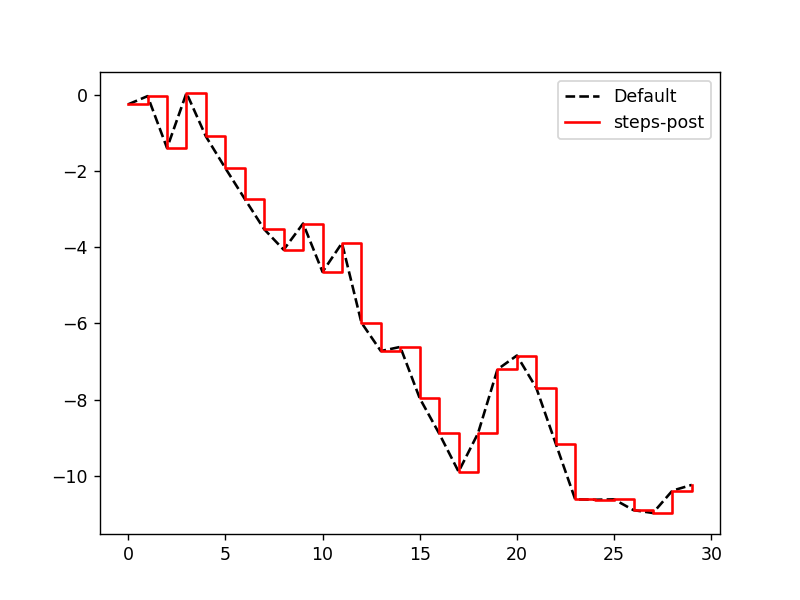

In [43]:
plt.figure()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'r-', drawstyle='steps-post', label='steps-post')
plt.legend()

### Ticks, Labels, and Legends

**xlim: plot range图表的范围**

In [44]:
plt.xlim()

(-1.4500000000000002, 30.45)

> return the current x-axis plotting range

**xticks: tick location刻度位置**

In [45]:
plt.xticks()

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 9 Text xticklabel objects>)

1. Called with no parameters returns the current parameter value
2. Called with parameters sets the parameter value

所有这些方法都是对当前或最近创建的*AxesSupplot*起作用的。它们各自对应subplot对象上的两个方法。如：`ax.set_xlim`和`ax.get_xlim`。

### Setting the title, axis labels, ticks, and ticklabels

illustrate customizing the axes(轴的自定义)

<IPython.core.display.Javascript object>


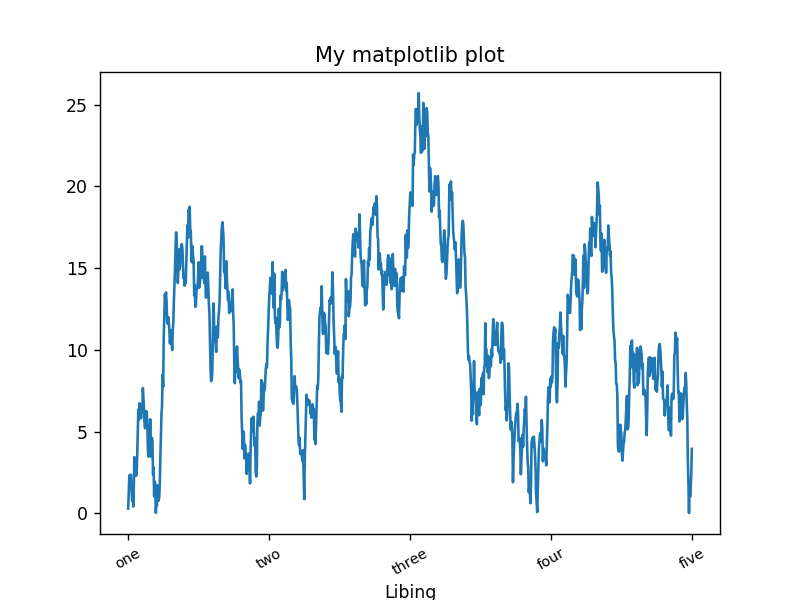

In [49]:
fig = plt.figure()

In [50]:
ax = fig.add_subplot(1, 1, 1)

In [51]:
ax.plot(np.random.randn(1000).cumsum())

**修改X轴的刻度（x-axis ticks），use `set_xticks`和`set_xticklabels`。**`set_xticks`instructs matplotlib where to pace the ticks along the data range(要将刻度放在数据范围中的哪些位置)，默认情况下，这些位置就是刻度标签。可以通过`set_xticklabels`将任何其他的用作标签。

In [52]:
# set x-axis ticks（设置X轴刻度）
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

In [53]:
# set x-axis tick labesl
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

> The `roration` option sets the x tick labels at a 30-degree roration.

**`set_xlabel` gives a name to the x-axis**

In [55]:
ax.set_xlabel('Libing')

Text(0.5,15.5284,'Libing')

**`set_title` sets the plot title**

In [56]:
ax.set_title('My matplotlib plot')

Text(0.5,1,'My matplotlib plot')

**The `axes` class has a `set` method that allows batch setting(批设置) of plot properties.**

前面的可写成：
```python
props = {
    'title': 'My matplotlib plot',
    'xlabels': 'Libing'
}
ax.set(**props)
```

Y轴的设置与X轴一样，把x写成y即可。

### Adding legends

Legends are another critical element for identifying plot elements.

有两种方式添加lengend

<IPython.core.display.Javascript object>


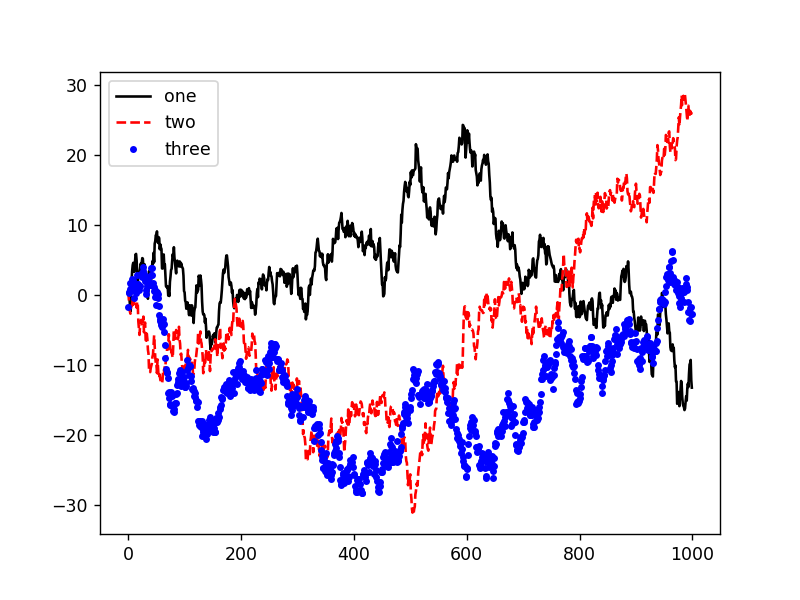

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111)

In [63]:
ax.plot(np.random.randn(1000).cumsum(),
        'k', label='one')

In [64]:
ax.plot(np.random.randn(1000).cumsum(),
        'r--', label='two')

In [65]:
ax.plot(np.random.randn(1000).cumsum(),
        'b.', label='three')

after,**either call `ax.legend()` or `plt.legend()` to automatically create a legend**

In [66]:
ax.legend(loc='best')

see the docstring (with ax.legend?) for more info

`loc` tells where to place the plot.

To exclude one or more elements from the legend(从legend中去除一个或多个元素), pass no label or `label='_nolegend_'`

### Annotations(注解) and Drawing on a Subplot(在subplot上绘图)

draw your own annotations, which could consist of *text*, *arrows*, or *other shapes*.

**Add annotations and text using the `text`, `arrow`, and `annotate` funcs.**

`text` draws text at given coordinates (x, y) on the plot with optional custom styling:
```python
ax.text(x, y, 'Hello, Li', family='monospace(等宽字体)', fontsize=10)
```

**Annotations can draw both text and arrows arranged appropriately.**

<IPython.core.display.Javascript object>


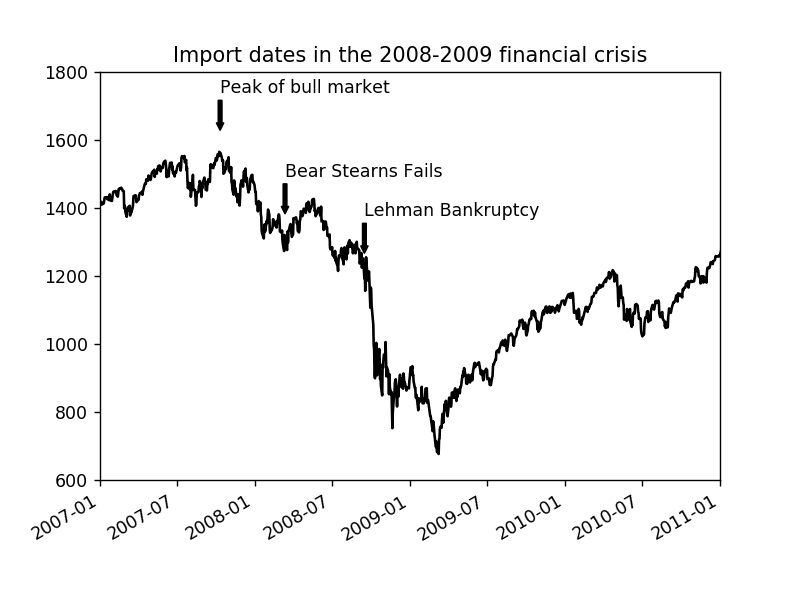

Text(0.5,1,'Import dates in the 2008-2009 financial crisis')

In [71]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(111)

data = pd.read_csv(r'F:\Downloads\pydata-book-2nd-edition\examples\spx.csv',
                   index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_date = [(datetime(2007, 10, 11), 'Peak of bull market'),
               (datetime(2008, 3, 12), "Bear Stearns Fails"),
               (datetime(2008, 9, 15), "Lehman Bankruptcy")]

for date, label in crisis_date:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                               headlength=4),
                horizontalalignment='left', verticalalignment='top')

# zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Import dates in the 2008-2009 financial crisis')

`ax.annotate` method can draw labels at the indicated x and y.

`set_xlim` and `set_ylim` methods to manually set the start and end boundaries for the plot rather than using matplotlib's default.

In [73]:
spx.head()

1990-02-01    328.79
1990-02-02    330.92
1990-02-05    331.85
1990-02-06    329.66
1990-02-07    333.75
Name: SPX, dtype: float64

In [75]:
spx.asof('1990-02-01')

328.79

常见图形的对象，这些对象被称为**块（patch）**。 有些在`matplotlib.pyplot`中，如`Rectangle`，`Circle`，但完整集合在`matplotlib.patches`中。

**在图表（plot）中增加一个图形（shape）**，需要创建patch object `shp`，然后通过`ax.add_patch(shp)`将其添加到subplot中。

<IPython.core.display.Javascript object>


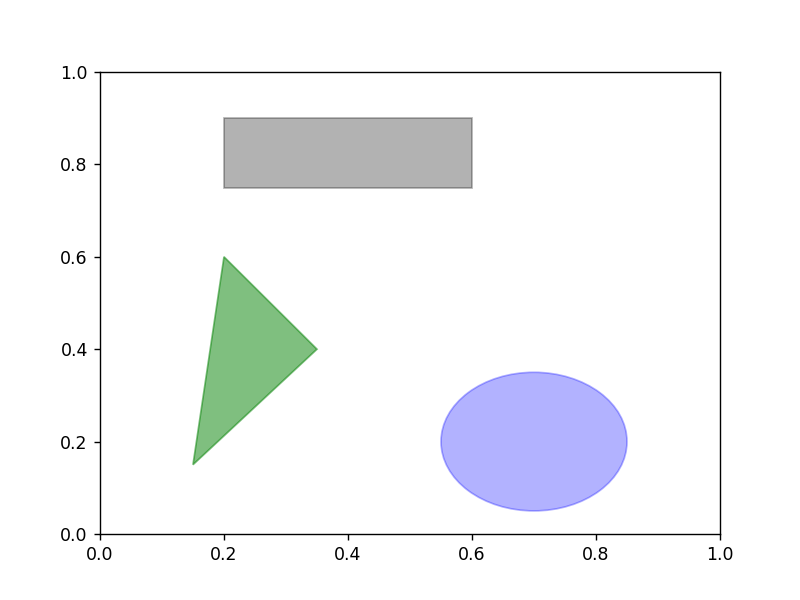

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving Plots to File

save the active figure to file using `plt.savefig`. This is equivalent to the figure object's `savefig` instance method.
```python
plt.savefig('figpath.svg')
```

The file type is inferred from the file extension.

There are a couple of important options used frequently for publishing graphics: **dpi**(which controls the dots-per-inch resolution,每英寸点数分辨率)and **bbox_inches**(trim the whitespace around the actual figure，剪除当前图表周围的空白部分).

得到带有最小白边且分辨率为400DPI的PNDG图片：
```python
plt.savefig('figpath', dpi=400, bbox_inches='tight')
```

`savefig` doesn't have to write to disk, it can also write to any file-like object, such as a *BytesIO*:
```python
from io import BytesIO
buffer = BytesIO(buffer)
plt.savefig(buffer)
plot_data = buffer.get_value()
```